## Problem Statement

One of the largest retail chains in the world wants to use their vast data source to build an efficient forecasting model to predict the sales for each SKU in its portfolio at its 76 different stores using historical sales data for the past 3 years on a week-on-week basis. Sales and promotional information is also available for each week - product and store wise. 

However, no other information regarding stores and products are available. Can you still forecast accurately the sales values for every such product/SKU-store combination for the next 12 weeks accurately? If yes, then dive right in!

Attribute Description
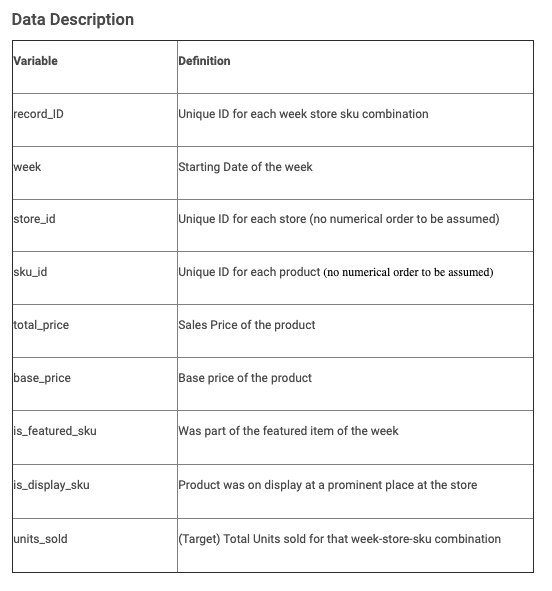

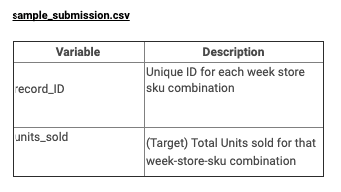

### Importing Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("max_columns", 100)
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [55]:
data = pd.read_csv("train_0irEZ2H.csv", delimiter=",")

In [56]:
data.head(5)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [58]:
data.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [59]:
data.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [60]:
n1 = data[data["total_price"].isnull()].index.tolist()
data.loc[n1]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,193915,23/04/13,9436,245338,NaN,469.5375,0,0,1


<AxesSubplot:xlabel='total_price'>

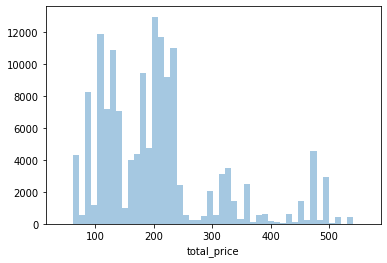

In [61]:
import seaborn as sns
sns.distplot(data["total_price"], kde=False)
plt.show()

In [62]:
#We can either replace the NaN value with mean or its base_price. Since its only one in number it wont make that much difference.
#So we can replace Null values by mean
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))
nulls = nulls[nulls>0]
nulls.columns = ["Null count"]
nulls.index.name = "Feature"

for cols in nulls[nulls["Null count"]>0].index:
    data[cols].fillna(data[cols].mean(), inplace=True)

#I usually do this to replace all values in all columns at single go

In [63]:
data.nunique()

record_ID          150150
week                  130
store_id               76
sku_id                 28
total_price           647
base_price            572
is_featured_sku         2
is_display_sku          2
units_sold            708
dtype: int64

In [64]:
#drop RecordID
data.drop("record_ID", 1, inplace=True)

In [65]:
categorical_col = data.select_dtypes(exclude=np.number).columns.tolist()
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
categorical_col
numerical_col

['week']

['store_id',
 'sku_id',
 'total_price',
 'base_price',
 'is_featured_sku',
 'is_display_sku',
 'units_sold']

In [93]:
numerical_col = data.select_dtypes(include=np.number).columns

for i in range(0, len(numerical_col), 2):
    if len(numerical_col) > i+1:
        
        plt.figure(figsize=(12,4))
        plt.subplot(121)
        sns.distplot(data[numerical_col[i]], kde=False)
        plt.title(numerical_col[i])
        plt.subplot(122)
        sns.distplot(data[numerical_col[i+1]], kde=False)
        plt.title(numerical_col[i+1])
        plt.tight_layout()
        plt.show()
    else:
        sns.distplot(data[numerical_col[i]], kde=False)
        plt.title(numerical_col[i])

In [94]:
numerical_col = data.select_dtypes(include=np.number).columns

for i in range(0, len(numerical_col), 2):
    if len(numerical_col) > i+1:
        
        plt.figure(figsize=(12,4))
        plt.subplot(121)
        sns.boxplot(data[numerical_col[i]])
        plt.title(numerical_col[i])
        plt.subplot(122)
        sns.boxplot(data[numerical_col[i+1]])
        plt.title(numerical_col[i+1])
        plt.tight_layout()
        plt.show()
    else:
        sns.distplot(data[numerical_col[i]], kde=False)
        plt.title(numerical_col[i])

### Few Insights

Sku_ID starting with 2 has higher number of units solds.

Few Sku_ID's total price and base price are very high. It means they are little expensive then other products

In [68]:
import datetime
data["year"] = pd.to_datetime(data["week"]).dt.year
data["month"] = pd.to_datetime(data["week"]).dt.month
data["day"] = pd.to_datetime(data["week"]).dt.day

In [69]:
import plotly
import plotly.graph_objects as go
gh = data.groupby("year")["sku_id","units_sold"].sum().sort_values(by="units_sold",ascending=True).reset_index()
data1 = [go.Bar(x=gh["year"],
                y=gh["units_sold"])]
layout = go.Layout(title="barplot", )
figure = go.Figure(data= data1, layout=layout)
figure.show()

In [70]:
gh = data.groupby("month")["sku_id","units_sold"].sum().sort_values(by="units_sold",ascending=True).reset_index()
data1 = [go.Bar(x=gh["month"],
                y=gh["units_sold"])]
layout = go.Layout(title="barplot", )
figure = go.Figure(data= data1, layout=layout)
figure.show()

In [71]:
q1 = data.groupby(["year","month"])["units_sold"].sum().reset_index()

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='month', ylabel='units_sold'>

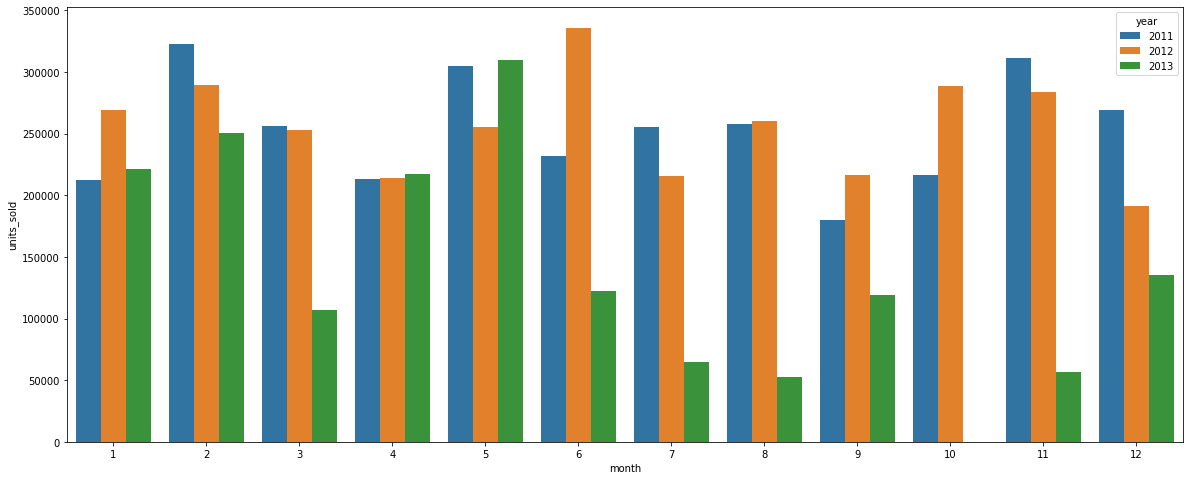

In [72]:
plt.figure(figsize=(20,8))
sns.barplot(x=q1["month"], y= q1["units_sold"], hue=q1["year"], data= data)

### Insights

1: Maximum units were sold in the year 2012. Although around same number of units were sold in 2011 year.

2: Sales are high at the initial 6 months in the year 2013 but were almost consistent for the year 2011 and 2012.

In [73]:
# import plotly.express as px
# fig = px.bar(q1, x="month", y="units_sold", color="year", barmode="stack")
# fig.show()

In [74]:
# import plotly.graph_objects as go
# animals=q1["month"].unique()

# fig = go.Figure(data=[
#     go.Bar(name='2011', x=animals, y=q1[q1["year"]==2011]["units_sold"]),
#     go.Bar(name='2012', x=animals, y=q1[q1["year"]==2012]["units_sold"]),
#     go.Bar(name='2013', x=animals, y=q1[q1["year"]==2013]["units_sold"])
# ])
# # Change the bar mode
# fig.update_layout(barmode='group')
# fig

In [75]:
#Lets create new columsn using Base Price and Total Price

data["Difference_Price"] = data["base_price"] - data["total_price"]

data["Relative_diff_base_price"] = data["Difference_Price"]/data["base_price"]
data["Relative_diff_total_price"] = data["Difference_Price"]/data["total_price"]

In [76]:
data.head(4)

,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day,Difference_Price,Relative_diff_base_price,Relative_diff_total_price
0,17/01/11,8091,216418,99.0375,111.8625,0,0,20,2011,1,17,12.825,0.11465,0.129496
1,17/01/11,8091,216419,99.0375,99.0375,0,0,28,2011,1,17,0.000,0.00000,0.000000
2,17/01/11,8091,216425,133.9500,133.9500,0,0,19,2011,1,17,0.000,0.00000,0.000000
3,17/01/11,8091,216233,133.9500,133.9500,0,0,44,2011,1,17,0.000,0.00000,0.000000


<Figure size 720x504 with 0 Axes>

<AxesSubplot:>

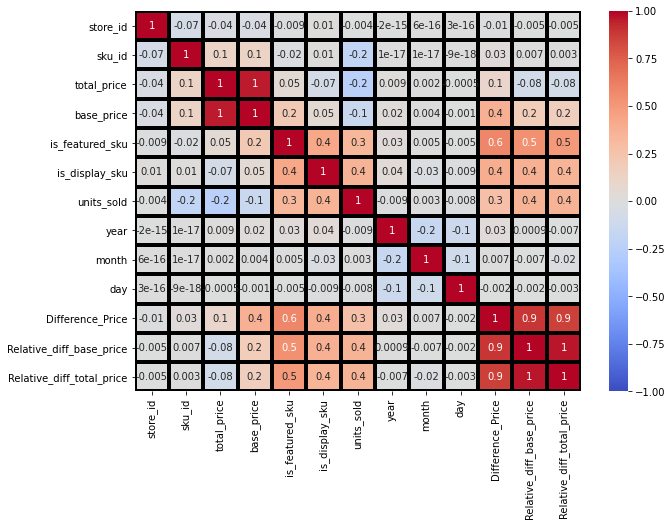

In [77]:
#Lets find the correlation of the attibute
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot = True, fmt= "0.1g", vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

So we can see that newly created columns have good correlation with Target (Units Sold). Similarly, is_display_sku and is_featured_sku has good correlation with Target varible. Also, to observe one thing, "total_price" and "base_price" are negatively correlated.

## Vanilla Models

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='units_sold'>

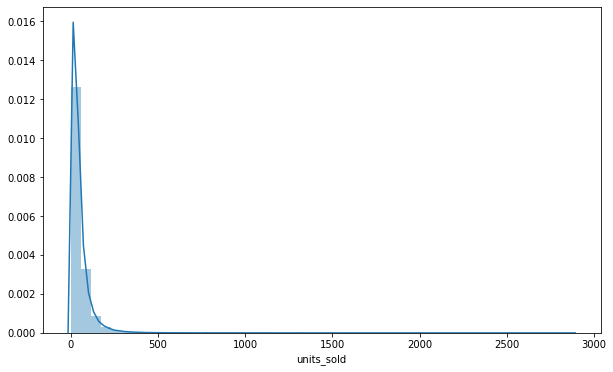

In [78]:
#Will begin with Normal basic Loistics Regression

#But Before that we know Lets see the output distribution of our Target variable
plt.figure(figsize=(10,6))
sns.distplot(data["units_sold"])

So you can see our Target variable is Skewed. We will apply log function to it so that our prediction will not be baised or one sided. Transformation will normalize the data.

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='units_sold'>

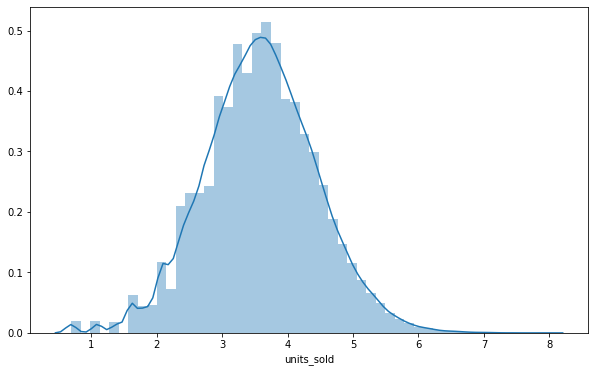

In [79]:
#Lets see how it looks post Transformation
plt.figure(figsize=(10,6))
sns.distplot(np.log1p(data["units_sold"]))

In [80]:
data.columns

Index(['week', 'store_id', 'sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku', 'units_sold', 'year', 'month',
       'day', 'Difference_Price', 'Relative_diff_base_price',
       'Relative_diff_total_price'],
      dtype='object')

In [81]:
data1 = data.copy()

In [82]:
data1.drop(["units_sold","week"], 1, inplace=True)

In [83]:
data.shape
data1.shape

(150150, 14)

(150150, 12)

In [84]:
from sklearn.model_selection import train_test_split

X = data1[list(data1.columns)]
y = np.log1p(data["units_sold"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(105105, 12)

(45045, 12)

(105105,)

(45045,)

In [85]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model = LR.fit(X_train, y_train)

In [86]:
y_pred = model.predict(X_test)

In [87]:
y_pred

array([3.50939295, 3.09969835, 5.00708825, ..., 3.43864027, 4.00524955,
       4.09490076])

In [89]:
def RMSLE(actual, predicted):

    predicted = np.array([np.log(np.abs(x+1.0)) for x in predicted])  # doing np.abs for handling neg values  
    actual = np.array([np.log(np.abs(x+1.0)) for x in actual])
    log_err = actual-predicted
    
    return 1000*np.sqrt(np.mean(log_err**2))

In [90]:
print(f'The validation RMSLE error for baseline model is: {RMSLE(np.exp(y_test), np.exp(y_pred))}')

The validation RMSLE error for baseline model is: 677.3075108177911
